 ### Step-1 Importing the important libraries and modules

In [3]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from pandas_profiling import ProfileReport
import sklearn.metrics as metrics

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn import preprocessing
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline, make_pipeline
import seaborn as sns

### Step-2 Importing the dataset

In [4]:
df  = pd.read_csv("D:/Downloads/adult.csv/adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Step-3 Information of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Step-4 Checking the null values

In [6]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Step-5 Cheking and handling the duplicated rows

In [7]:
df.duplicated().sum()

52

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

### Analysis of dataset

In [10]:
for i in df.columns:
    a = df.value_counts(i)
    print(f'\n\n\nvalues of {a}')




values of age
36    1348
35    1336
33    1335
23    1325
31    1324
      ... 
88       6
85       5
87       3
89       2
86       1
Length: 74, dtype: int64



values of workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
dtype: int64



values of fnlwgt
203488     21
190290     19
120277     19
125892     18
126569     18
           ..
163443      1
163393      1
163385      1
163380      1
1490400     1
Length: 28523, dtype: int64



values of education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool   

so, from the above description <br>
**coloumns which have "?" or missing values are :** <br>
* workclass  _(categorical)_<br>   
* occupation  _(categorical)_<br>  
* native-country  _(categorical)_<br>

**coloumns which have "0" or missing values are :** <br>
* capital-gain
* capital-loss

### Step-6 Handling missing values of categorical columns

Removing the columns (capital-gain and capital-loss) because more than 90% entries are not filled i.e. zero.

In [11]:
df = df.drop(['education'],axis=1)
df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


* **replacing '?' with NaN.**

In [12]:
df.replace('?',np.nan,inplace=True)
df.isnull().sum()

age                   0
workclass          2795
fnlwgt                0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

* **Performing SimpleImputer.**

In [13]:
imputer = SimpleImputer(strategy='most_frequent')
imputer

SimpleImputer(strategy='most_frequent')

In [14]:
df['workclass'] = imputer.fit_transform(df[['workclass']])

df['occupation'] = imputer.fit_transform(df[['occupation']])

df['native-country'] = imputer.fit_transform(df[['native-country']])

In [15]:
#df.isna().sum()

### Step-7 Performing the column_transformations :

In [16]:
encode = preprocessing.LabelEncoder()
df['income'] = encode.fit_transform(df['income'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   educational-num  48790 non-null  int64 
 4   marital-status   48790 non-null  object
 5   occupation       48790 non-null  object
 6   relationship     48790 non-null  object
 7   race             48790 non-null  object
 8   gender           48790 non-null  object
 9   capital-gain     48790 non-null  int64 
 10  capital-loss     48790 non-null  int64 
 11  hours-per-week   48790 non-null  int64 
 12  native-country   48790 non-null  object
 13  income           48790 non-null  int32 
dtypes: int32(1), int64(6), object(7)
memory usage: 5.4+ MB


In [18]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886,0.239414
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729,0.426730
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [19]:
df.income.unique()

array([0, 1])

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

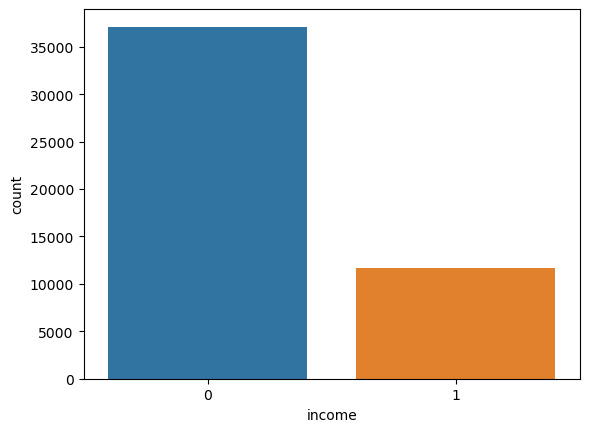

In [20]:
sns.countplot(df.income)

Where ' 1 means income>=50k ' & ' 0 means income<50k '

<AxesSubplot:>

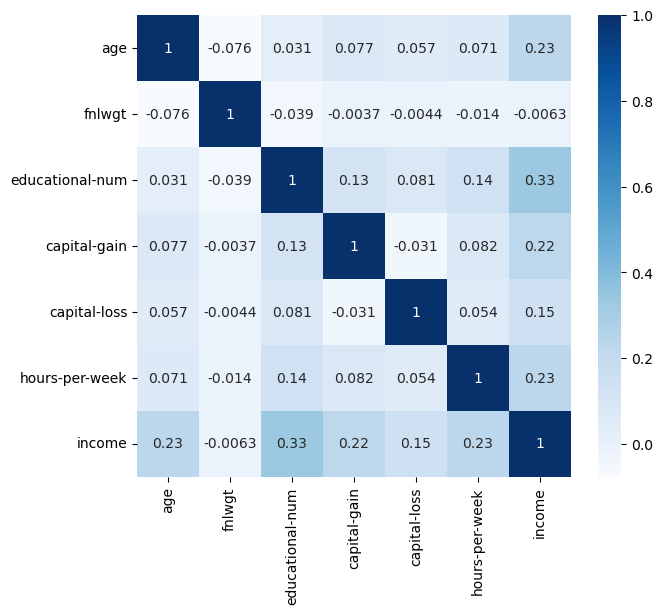

In [21]:
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [22]:
x = df.drop('income',axis=1)
y = df['income']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

--------------------------------------

In [24]:
# import lazypredict
# from lazypredict.Supervised import LazyClassifier
# clf = LazyClassifier()
# clf

In [25]:
# models,predicitons = clf.fit(x_train,x_test,y_train,y_test)

In [26]:
# models

-------------------------------

In [27]:
transformer1 = ColumnTransformer(transformers=[
    ('trs1',SimpleImputer(),[0,2,11]),
    ('trs2',OrdinalEncoder(),[1,5]),
    ('trs3',OneHotEncoder(),[4,6,7,8,12])],
    remainder='passthrough')
transformer1

ColumnTransformer(remainder='passthrough',
                  transformers=[('trs1', SimpleImputer(), [0, 2, 11]),
                                ('trs2', OrdinalEncoder(), [1, 5]),
                                ('trs3', OneHotEncoder(), [4, 6, 7, 8, 12])])

In [28]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

transformer3 = LGBMClassifier()
transformer3

LGBMClassifier()

In [29]:
transformer2 = RandomForestClassifier(class_weight='balanced')
transformer2

RandomForestClassifier(class_weight='balanced')

### Step-9 Creating Pipeline

In [30]:
pipe = Pipeline([
    ('transformer1',transformer1),
    ('transformer3',transformer3)
    ])
pipe

Pipeline(steps=[('transformer1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trs1', SimpleImputer(),
                                                  [0, 2, 11]),
                                                 ('trs2', OrdinalEncoder(),
                                                  [1, 5]),
                                                 ('trs3', OneHotEncoder(),
                                                  [4, 6, 7, 8, 12])])),
                ('transformer3', LGBMClassifier())])

In [31]:
#for display the pipeline
from sklearn import set_config
set_config(display = 'diagram')

### Step-10 Fitting the Pipeline

In [32]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('transformer1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trs1', SimpleImputer(),
                                                  [0, 2, 11]),
                                                 ('trs2', OrdinalEncoder(),
                                                  [1, 5]),
                                                 ('trs3', OneHotEncoder(),
                                                  [4, 6, 7, 8, 12])])),
                ('transformer3', LGBMClassifier())])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   educational-num  48790 non-null  int64 
 4   marital-status   48790 non-null  object
 5   occupation       48790 non-null  object
 6   relationship     48790 non-null  object
 7   race             48790 non-null  object
 8   gender           48790 non-null  object
 9   capital-gain     48790 non-null  int64 
 10  capital-loss     48790 non-null  int64 
 11  hours-per-week   48790 non-null  int64 
 12  native-country   48790 non-null  object
 13  income           48790 non-null  int32 
dtypes: int32(1), int64(6), object(7)
memory usage: 5.4+ MB


### Step-11 Prediction

In [34]:
y_pred = pipe.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

### Step-12 Calculating Accuracy

In [35]:
accuracy_score(y_test,y_pred)

0.8759991801598688

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


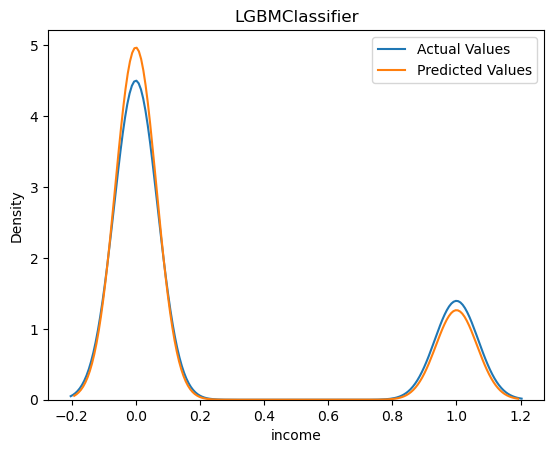

In [36]:
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(y_pred,hist=False,label='Predicted Values')
ax.set_title('LGBMClassifier')
plt.legend()

### Step-13 Calculating F1 Score

In [37]:
f1_score(y_test,y_pred)

0.7176854876341577

### Step-14 Consusion Matrix

In [38]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

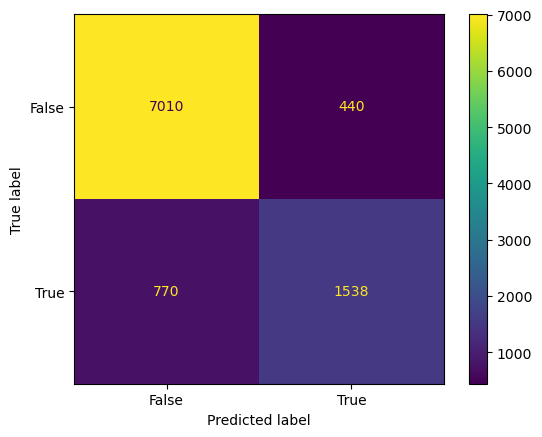

In [39]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

The Confusion Matrix created has four different quadrants: <br>
* True Negative (Top-Left Quadrant) <br>
* False Positive (Top-Right Quadrant) <br>
* False Negative (Bottom-Left Quadrant) <br>
* True Positive (Bottom-Right Quadrant) <br>

_True means that the values were accurately predicted, False means that there was an error or wrong prediction._

### Step-15 ROC Curve

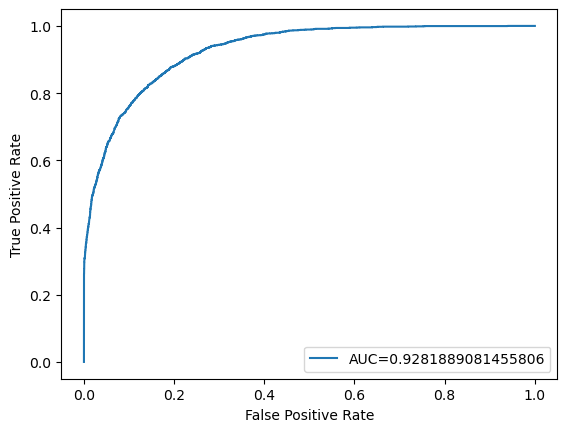

In [40]:
y_pred_proba = pipe.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

-------------------------------------------------------------------------------------------------
---------------------------------------------

### Dumping Pickle File

In [41]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

-----------------------THANK YOU-------------------------